# Phase 2 Project
**Client:** Zillow Group, Inc
**Author**: Tommy Phung

## Overview
[**Zillow**](https://www.zillow.com/) is an online real estate website that helps homeowners to buy, sell and rent homes.  The dataset from King Country House Sales was used to model the effect on price.  The dataset has multiple potential attributes of a house that would justify a higher house price while others are not as influential. <br>

**Model 1:** The first model was modeled using square feet of living as the only parameter. <br>
That resulted in a relationship of a base cost of 260,974 and for every square foot, expected an increase in 355 which accounted for **36.2%** of the variance. <br>

**Model 2:** The second model added grade, which was the second highest correlation, alongside square feet of living.  <br>
The base cost of -626,890 for any given house. For every square foot increase the price by 231 while for every grade increased the price by $150702. The model explains **41.8%** of the variance. <br>

**Model 3:** The third model adds the house age which was expected to lower the house price. <br>
The base cost of -1,286,000 for any given house. For every square foot increase the price by 221 while for every grade increased the price by 216,400. For every year the house increase by 3867 due to age. The model explains **46.4%** of the variance.<br>

**Final Model V1:** The final model has most of the attributes of a house that proved to be linearly beneficial to price. Interaction terms were added as well with grade and square feet of living, the top two correlations to price. The model explains **50.1%** of the variance. <br>

**Final Model V2:** Some of the final models weren't statistically significant and had little to no impact. There were removed for a cleaner interpretation. Since, adding a parameter only increases the R squared score, this model explained **49.6%** of the variance. Keeping relevant parameter enable users to read the model better. 

## Business Understanding
My client is **Zillow**, which helps buyers and sellers through their website with a list of all the available houses in a given area. A user can select preferences on houses to filter out there the desired house.  <br>
Currently, houses are sold with the given information and priced based on the user's input. There are two ways to determine the price of a house on the website. First, there are past selling prices of the house which are publicly displayed to see. Second, Zillow has what is called Zestimate to give the user an idea of how the market price of the house.  The former doesn't take into consideration anything that the current home buyer could infer. To improve their system, models should be given and integrated if prove useful. 

For **buyers**, it is particularly useful to determine if the house is reasonably priced before purchasing. Knowing what attributes increase or decrease a house's price may influence whether or not a desired detail is worth the price for it.  <br>

For **sellers**, knowing what is desirable and the cost for it may allow the seller to change them if possible. For example, if the number of bedrooms increases the house price enough, the seller may invest in making more or less depending on the model. 

Price is arguably the most important aspect of purchasing a house so we will be looking at how the cost change based on different attributes. A model is created to let Zillow be able to integrate and let buyers and sellers what the price should be. Zillow does have an estimate which could be replaced or combined to make a better model. 

## Data Understanding
The dataset that is being used is from [King County](https://kingcounty.gov/) <br>

There are **30155** houses listed in the dataset with **25** different columns. Although there are a lot of attributes in a house, not all of them influence the house price. By plotting and modeling the different variables, we can see which attributes are important and which to ignore. This data spans to as late 1900 so there is a substantial amount of data from the years that can give a rough idea of the housing market in the area. <br>
}
Using dummy variables, we can model the continuous variables with the categorical variables to determine which combination of parameters is useful in predicting the house price. <br>

Although we would like to use all of the available data, that is simpling not easy to model so some variables are excluded. Some variables such as ID, address, latitude, and longitude are excluded since they should have any influence on price. The following were the columns in the dataset to consider and the ones that were removed. 

| Continuous    | Categorical  | Unused  | Removed    |
|---------------|--------------|---------|------------|
| sqft_living   | bedrooms     | date    | sqft_above |
| sqft_lot      | bathrooms    | id      | nuisance   |
| sqft_above    | floors       | lat     |            |
| sqft_basement | waterfront   | long    |            |
| sqft_garage   | greenbelt    | address |            |
| sqft_patio    | nuisance     |         |            |
|               | condition    |         |            |
|               | view         |         |            |
|               | grade        |         |            |
|               | heat_source  |         |            |
|               | sewer_system |         |            |

## Data Imports
Imported libraries that were used in the project.

In [1]:
import pandas as pd  
from resources import helper_functions_v2 as cc   # All functions created for project
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")    # Used to temporary silence warnings
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')    #Read the file
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


## Data Preperation 
Before I can create a model with all of the given parameter, I need to prepare the categorical data and remove outliers. 

In [3]:
## Setup for columns and subsets
useful_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront'
              , 'greenbelt', 'view', 'condition', 'grade', 'heat_source', 'sewer_system'
              , 'sqft_basement', 'sqft_garage', 'sqft_patio', 'nuisance', 'sqft_above','yr_built' ]

useless_col = ['date', 'id', 'lat', 'long', 'address']
categorical = [ 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt',
               'view', 'condition', 'grade', 'heat_source', 'sewer_system']
object_categories = ['waterfront', 'greenbelt', 'view', 'condition', 'heat_source', 'sewer_system']
continuous = [column for column in useful_col if column not in categorical] # 'price','sqft_living', 'sqft_lot', 
                                                                            # 'sqft_basement', 'sqft_garage', 'sqft_patio'

### Data Cleaning - Overall Cleaning
1. Remove missing values - Not too many and large enough sample size to safely remove
2. Remove duplicates - Only one duplicate in the set that has the same data
3. Remove unused columns - Not going to consider so the dataframe will be sliced without them
4. Rename grade - Since grade was a mixed string and integers, integer was easier to model to start with

In [4]:
## Data is removed if they are duplicates or if they are outliers or not going to be in the model ## 

df_cleaned = cc.check_and_drop(df)    ## Dropped and removed rows that has small amount of missing values
df_cleaned = cc.outliers_remove(df_cleaned, 'price')    ## Remove outliers of price
df_cleaned.drop(labels = useless_col, axis = 1, inplace = True)    # Drop columns that wont be useful right now
df_cleaned.drop(df_cleaned.loc[df_cleaned['sqft_living'] == 0].index, inplace = True)    ## Found a house that has sqft_living of 0 which messes with some plotting

Number of Missing Values: 46
Dropping rows: heat_source
Dropping rows: sewer_system
Number of duplicates: 1
Removed 1 duplicates
1214 observations were removed. 


In [5]:
## Map dictionary to change the strings in integer. ##
grade_map = {'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10, '5 Fair': 5, 
             '11 Excellent': 11, '4 Low': 4, '12 Luxury':12, '3 Poor': 3, '13 Mansion': 13, '2 Substandard' : 2}
df_cleaned.replace(grade_map, inplace= True)

In [6]:
## New variable to account for the year a house was renovated
## Yr_built is changed to be House Age. 

df_cleaned['relative_age'] = df_cleaned['yr_built'].max() - df_cleaned['yr_renovated']
df_cleaned['relative_age'].loc[df_cleaned['relative_age'] == 2022] = df_cleaned['yr_built'].max() - df_cleaned['yr_built']
df_cleaned['house_age'] = df_cleaned['yr_built'].max() - df_cleaned['yr_built'] 

In [7]:
## Create the dummy variables and remove certain columns to get a reference

df_w_dummies = pd.get_dummies(df_cleaned)    ## Create Dummy variables
final_refer = ['waterfront_NO', 'greenbelt_NO', 'nuisance_NO', 'view_NONE', 'condition_Average', 'heat_source_Oil', 'sewer_system_PRIVATE']    ## When creating dummy variables, the data need a reference to avoid the dummy trap. 
df_w_dummies.drop(final_refer, axis = 1, inplace= True)

### Model 2 Preperation

In [8]:
## New dataframe with grade as a string object instead of a integer object

df_second_dum = df_w_dummies.copy()
df_second_dum['grade'] = df_second_dum['grade'].astype(str)
df_second_dum = pd.get_dummies(df_second_dum, columns= ['grade'])     
df_second_dum.drop('grade_7', axis = 1, inplace =True)

### Final Model Prepartion 
The final model combined all of the used parameters and grouped all of the small observations into a single group called 'others'. Grade was initially turned into a integer which was able to model easier initially. Since not all grade were benefitical, I decided to treat them as categories and see if grade was able to interact with living space. 

In [9]:
## All categories and the number of times they appear
df_other = df_cleaned.copy()

## Grouped all the categories that are less than 300 
for column in ['view', 'condition','heat_source', 'sewer_system']:
    replace = df_other[column].value_counts()[df_other[column].value_counts()< 300].index
    df_other[column].replace(replace, value= 'other',inplace= True)

## Convert Grade back into a string object
df_other['grade'] = df_other['grade'].astype(str)
df_final = pd.get_dummies(df_other)
df_final.drop(final_refer, axis = 1, inplace= True)
df_final.drop('grade_7', axis = 1, inplace =True)

## Create interaction terms with each of the grades
for level in [2,3,4,5,6,8,9,10,11,12,13]:
    df_final['grade{}*living'.format(level)] = df_final['grade_{}'.format(level)] * df_final['sqft_living']

In [10]:
## First consideration to the model

best_corr = cc.correlation_with(df_w_dummies, 'price')    ## Helper function that return the variables that correlate to a given column and return them as a list
best_corr[0]    ## The best correlating parameter

('sqft_living', 0.6019551412003955)

## Modeling

### Baseline Model

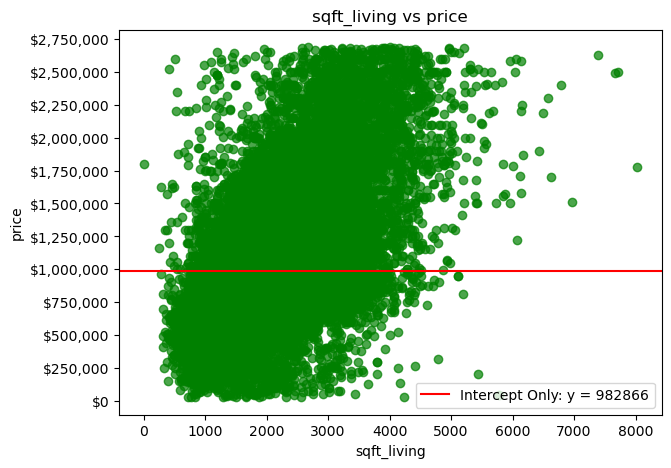

In [11]:
cc.plot_dataframe(df_w_dummies[['sqft_living']],  df_w_dummies[['price']],df_w_dummies['price'].mean());

#### Evaluation
The model is y = 982866 with y being the mean of house prices. Although the model is very simple, it does not take into account anything with the house attributes. There is also an uneven amount of houses above and below the price average that the model doesn't fit well. <br>
**There is a clear positive relationship that can perform better than the intercept-only model.** Some variables have high correlations that could prove useful. 

### First Model

#### Square Feet of Living Model
The first model has only the square feet of living since it has the highest correlation to the price. Since square foot of living had a linear relationship to price, it should be pretty accurate on predicting price base solely on square footage. 

In [12]:
X = df_w_dummies[['sqft_living']]    #One variable 
y = df_w_dummies['price']    # Always with price as dependent
model_living, result_living = cc.model_and_regression(X, y);    # Return the model and results for the given X and y

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:36   Log-Likelihood:            -4.1338e+05
No. Observations:               28896   AIC:                         8.268e+05
Df Residuals:                   28894   BIC:                         8.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.61e+05   6094.353     42.822      

#### Regression Plot 

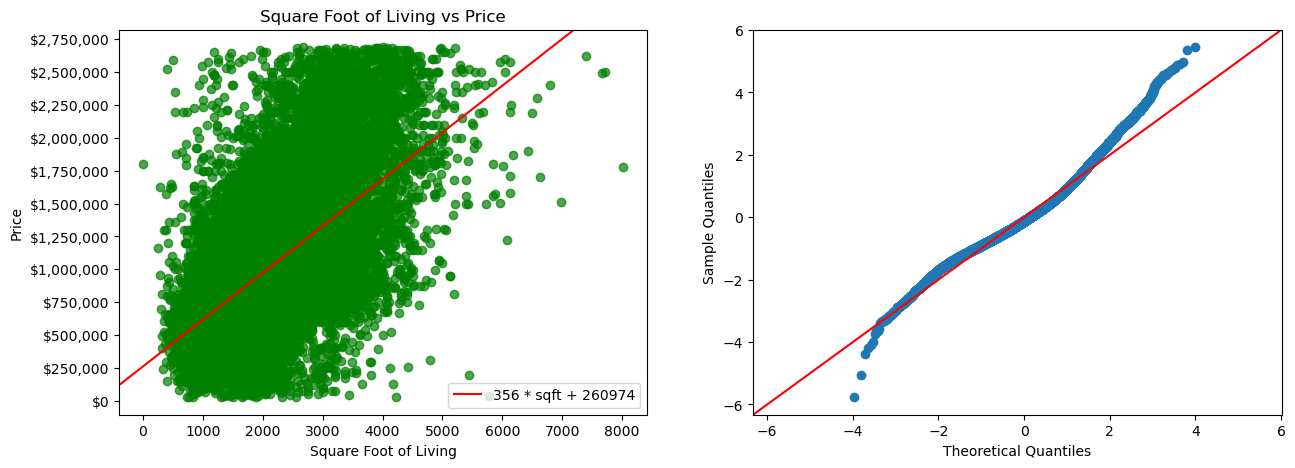

In [13]:
### Graph the scatter plot and the regression plot along the same plot
fig, ax = plt.subplots(ncols=2, figsize = (15,5))

ax[0].scatter(df_w_dummies['sqft_living'], df_w_dummies['price'], alpha = .7, color = 'green')
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Square Foot of Living')

ax[0].set_title('Square Foot of Living vs Price')
y_ticks = np.arange(0,3000000, 250000)
y_ticks_str = ['${:,}'.format(y) for y in y_ticks]
ax[0].set_yticks(np.arange(0,3000000, 250000));
ax[0].set_yticklabels(y_ticks_str);

fig_1 = sm.graphics.abline_plot(model_results= result_living, ax = ax[0], color = 'red', label = '{} * sqft + {}'.format(round(result_living.params[1]), 
                                                                                                                      round(result_living.params[0])))
ax[0].legend();
fig_1_res = sm.graphics.qqplot(result_living.resid, dist=stats.norm, line='45', fit=True, ax= ax[1])

### Second Model
For the second model, we will be adding the second highest correlation with price. Grade had the second and is a numerical category data.  

#### Square foot of living and Grade

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.038e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:37   Log-Likelihood:            -4.1206e+05
No. Observations:               28896   AIC:                         8.241e+05
Df Residuals:                   28893   BIC:                         8.241e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.269e+05   1.79e+04    -35.113      

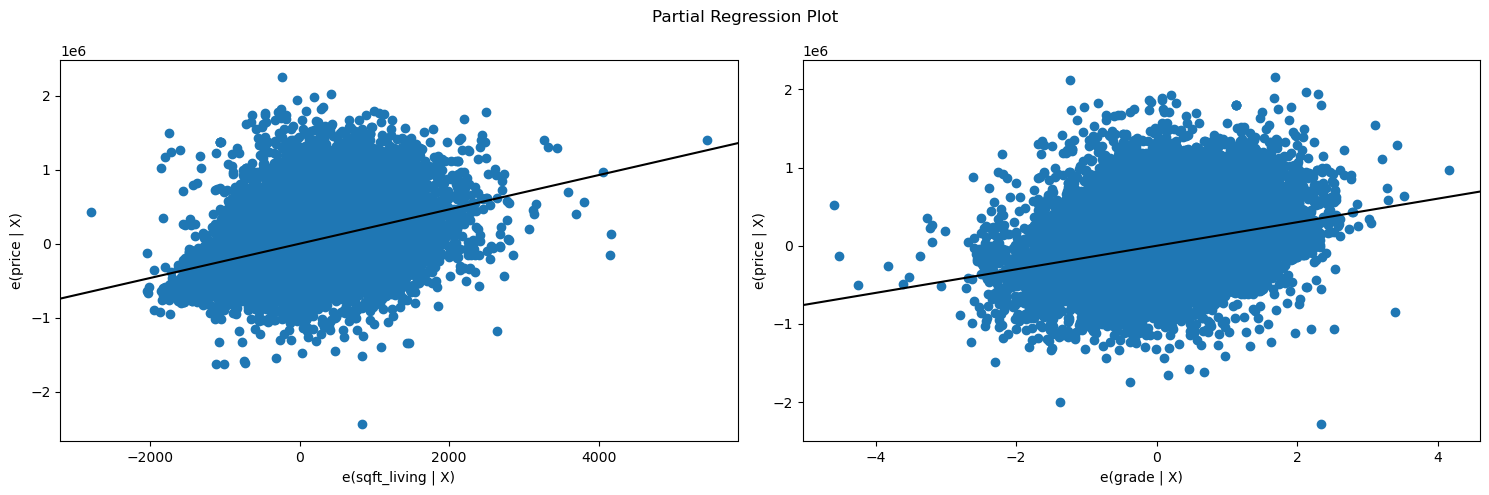

In [14]:
X = df_w_dummies[[ 'sqft_living', 'grade']]
y = df_w_dummies['price']

model_2, result_2 = cc.model_and_regression(X,y) # Return the model and results for the given X and y

#### Model Alternative
Grade was change to categorical objects and created dummy variables

In [15]:
X = df_second_dum[[ 'sqft_living','grade_2', 'grade_3', 'grade_4', 'grade_5','grade_6'
                   , 'grade_8', 'grade_9', 'grade_10','grade_11','grade_12', 'grade_13']]
y = df_second_dum['price']
model_2_dum = sm.OLS(y, sm.add_constant(X))
result_2_dum = model_2_dum.fit()
print(result_2_dum.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1839.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:38   Log-Likelihood:            -4.1168e+05
No. Observations:               28896   AIC:                         8.234e+05
Df Residuals:                   28883   BIC:                         8.235e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.225e+05   7002.130     60.343      

### Third Model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     8347.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:38   Log-Likelihood:            -4.1086e+05
No. Observations:               28896   AIC:                         8.217e+05
Df Residuals:                   28892   BIC:                         8.218e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.286e+06   2.16e+04    -59.456      

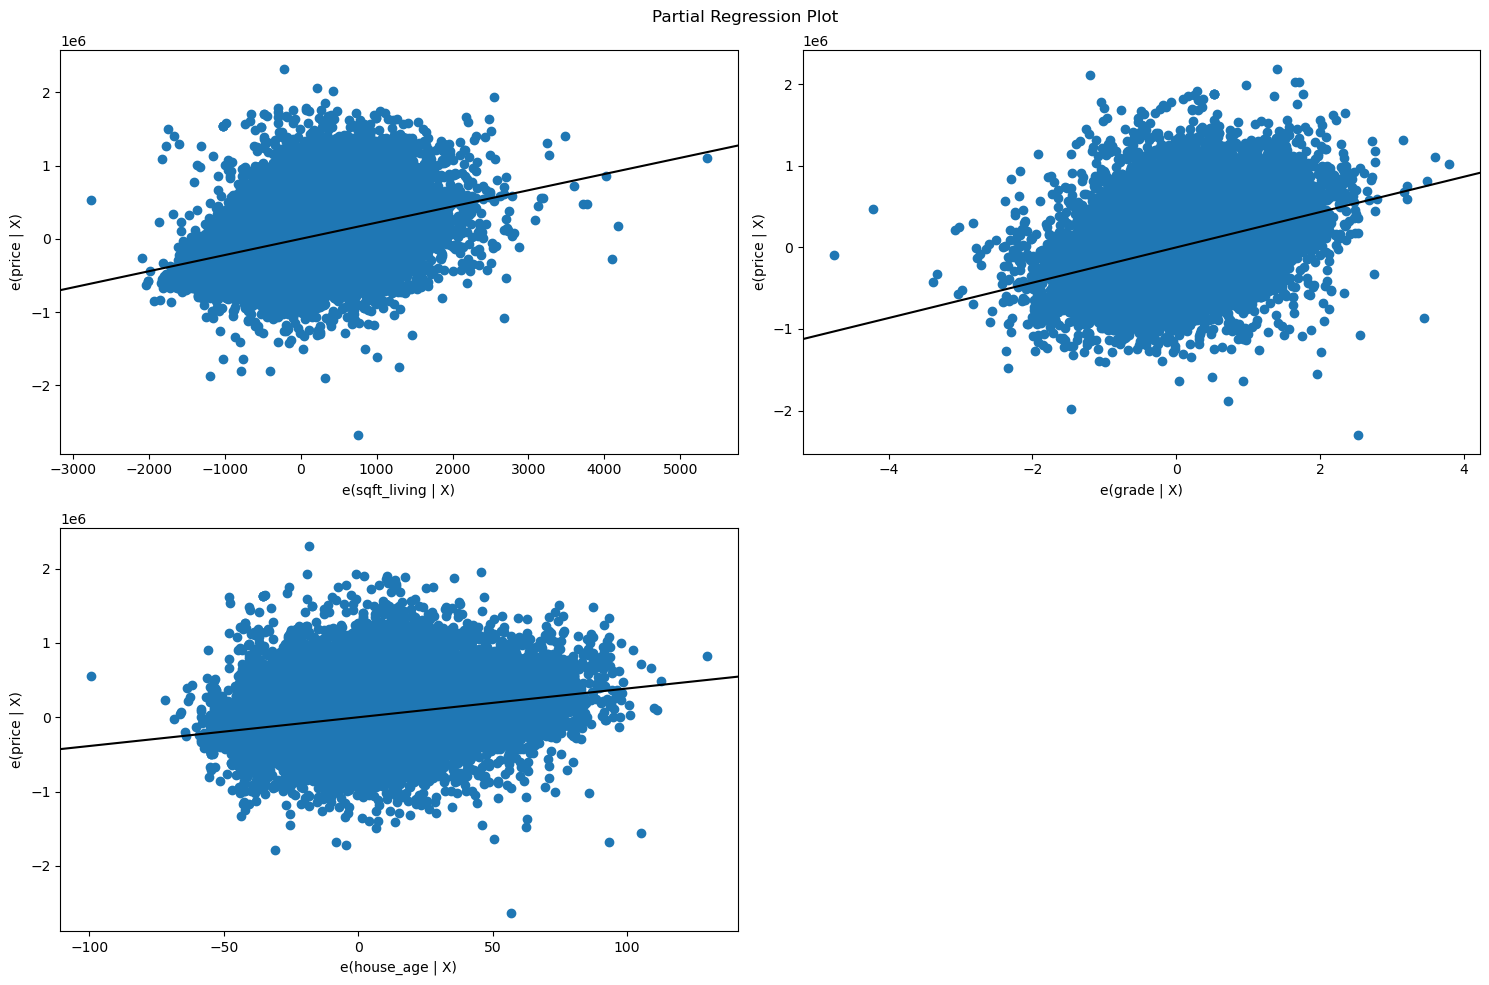

In [16]:
X = df_w_dummies[[ 'sqft_living', 'grade', 'house_age']]
y = df_w_dummies['price']

model_3, result_3 = cc.model_and_regression(X,y)

In [17]:
X = df_second_dum[[ 'sqft_living','grade_2', 'grade_3', 'grade_4', 'grade_5','grade_6'
                   , 'grade_8', 'grade_9', 'grade_10','grade_11','grade_12', 'grade_13', 'house_age' ]]
y = df_second_dum['price']
model_living_grade_2 = sm.OLS(y, sm.add_constant(X))
result_living_grade_2 = model_living_grade_2.fit()
print(result_living_grade_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     2022.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:39   Log-Likelihood:            -4.1053e+05
No. Observations:               28896   AIC:                         8.211e+05
Df Residuals:                   28882   BIC:                         8.212e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.136e+05   7972.697     26.794      

## Extra Plots - Potentially significant
Although it is hard to interpret categorical variables, I was able to make some conclusion to have them included in the final model. <br> 
**Results**: The mean price of a house with or without nuisance are negilable while a house being at a waterfront or greenbelt has a significant difference. 

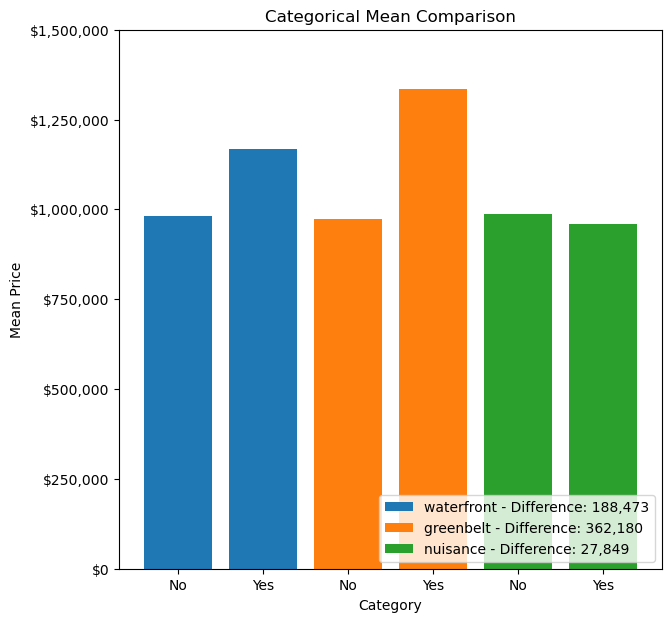

In [18]:
label =['waterfront', 'greenbelt', 'nuisance']    #Labels for the legend and labels
x_group = cc.group_by_2_cat(df_cleaned, label, 'price')    ## Setup by grouping the columns and obatining the mean

fig, ax = plt.subplots(figsize = (7, 7));    # Setup for plotting 

r = np.arange(2)    # Spacing for the bar plots
width = 2    # Basic width of each bar
index = 0    # Index through all the groups

### Plot each of the groups side by side for clarity
for group in x_group:
    
    ax.bar(r + width * index, group[0:2], label = '{} - Difference: {:,}'.format(label[index], abs(round(group[1]-group[0]))));
    index += 1
### Ticks labeling and spacing 
x_ticks = np.arange(6)    
y_ticks = np.arange(0,1750000, 250000)
y_ticks_str = ['${:,}'.format(y) for y in y_ticks]

### Labels and Titles
plt.title('Categorical Mean Comparison');
plt.xlabel('Category')
plt.ylabel('Mean Price');
plt.xticks(x_ticks, ['No','Yes','No','Yes','No','Yes']);

ax.set_yticks(np.arange(0,1750000, 250000));
ax.set_yticklabels(y_ticks_str);

plt.legend(loc = 'lower right');

## Final Model
For the final model, there are a couple that needed to be considered. <br>
First, the final model will include as many parameters as possible (at first) and all of the categorical data types needs dummy variables. <br>
While exploring the dataset, some categories have very observation so I grouped them using 300 (roughly 1%) as the cut off. <br>
And lastly, I change grade to be an integer for the sake of modeling earlier but will change it back to an object and create dummy variables and intereaction term with square foot of living. The reason was that both were highly correlating to price leaving the best chances to be interactive with one another.

In [19]:
X = df_final[df_final.columns[1:]]
y = df_final['price']
model_final= sm.OLS(y, sm.add_constant(X))
results_final = model_final.fit()
print(results_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     617.7
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:39   Log-Likelihood:            -4.0982e+05
No. Observations:               28896   AIC:                         8.197e+05
Df Residuals:                   28848   BIC:                         8.201e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


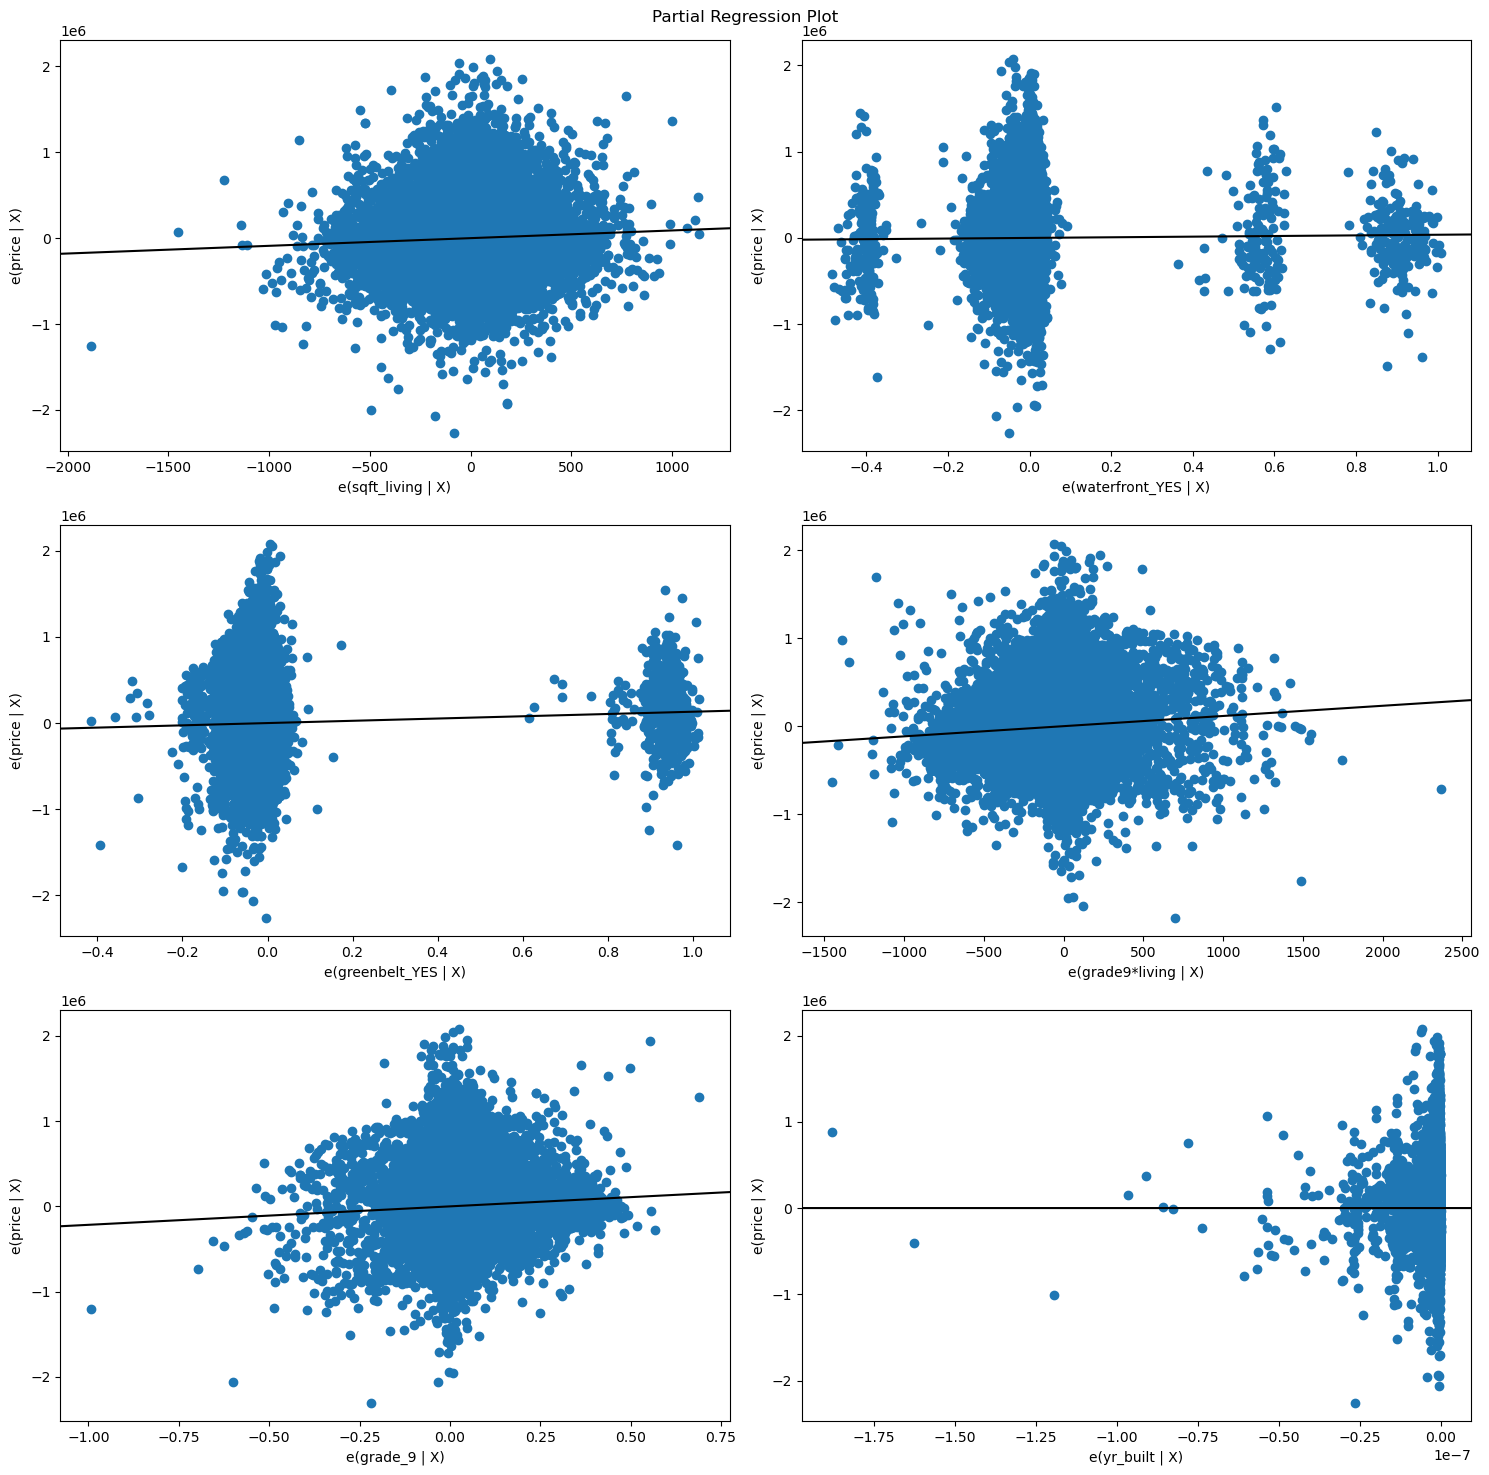

In [20]:
fig = plt.figure(figsize=(15,15));
sm.graphics.plot_partregress_grid(results_final, exog_idx=['sqft_living','waterfront_YES', 'greenbelt_YES', 'grade9*living','grade_9','yr_built' ], fig= fig);
plt.tight_layout();

## Clean Final Model
Although the final model explains over 50% of the variance, there was a good amount of parameters that were statictally insignifcant or didn't have a strong relationship to justify them being in the model. <br>
I kept most of the contiuous parameters while removed the categorical parameters to obtain a slightly different model. <br>
The advantage of the model is that all parameters that are expected to increase or decrease price are reflect in the model and are statiscially significant. Keepign the relavanet parameters will give stakeholders a better idea on what truly influences price by a degree that would be worht while to invest into. 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     815.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:05:07   Log-Likelihood:            -4.0995e+05
No. Observations:               28896   AIC:                         8.200e+05
Df Residuals:                   28860   BIC:                         8.203e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.914e+05   1

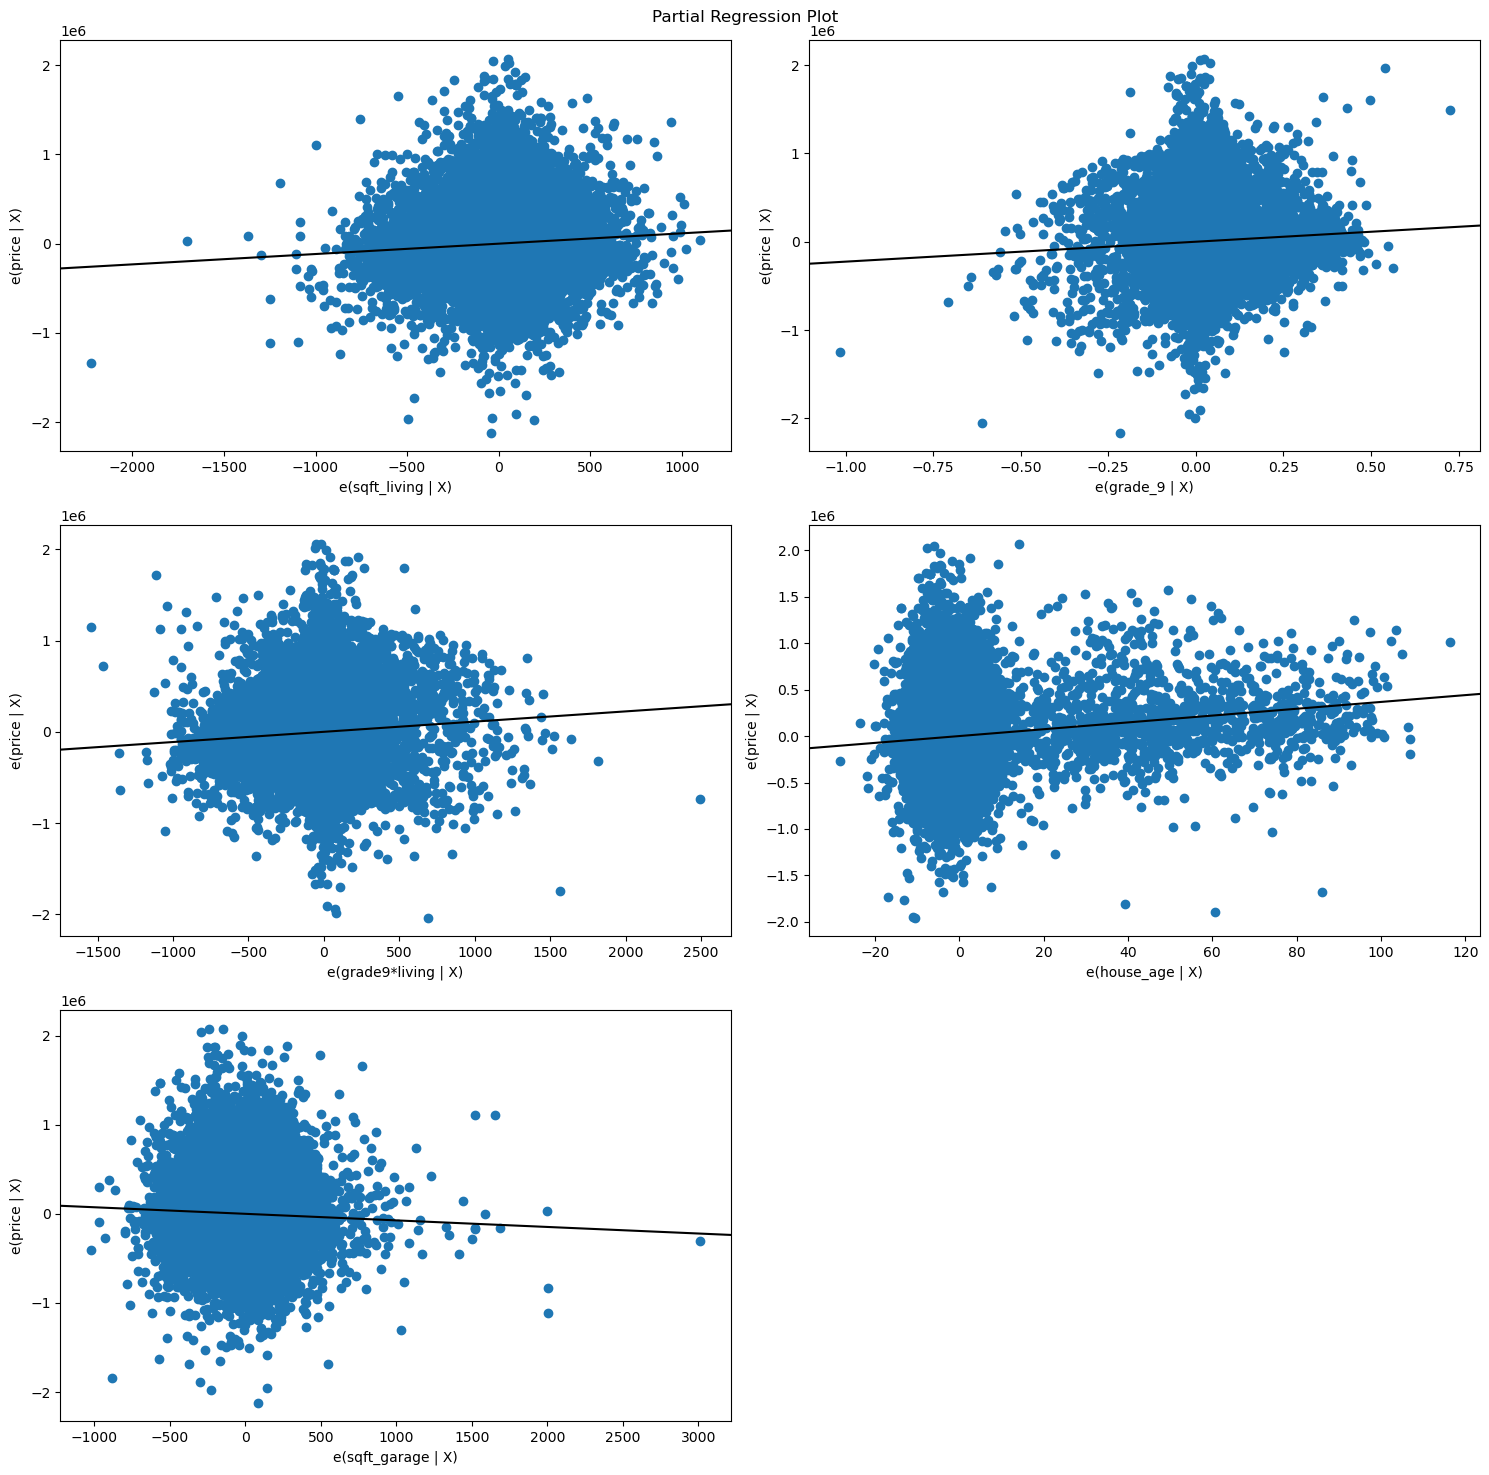

In [30]:
X = df_final[['sqft_living','floors',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'relative_age', 'house_age', 
       'greenbelt_YES', 'view_AVERAGE', 'view_EXCELLENT',
       'view_GOOD', 'view_other', 'condition_Good', 'condition_Very Good',
        'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_8',
       'grade_9', 'heat_source_Gas',
       'heat_source_other', 'sewer_system_PUBLIC', 
       'grade4*living', 'grade5*living', 'grade6*living',
       'grade8*living', 'grade9*living', 'grade10*living', 'grade11*living',
       'grade13*living']]
y = df_final['price']
model_final_2 = sm.OLS(y, sm.add_constant(X))
result_final_2 = model_final_2.fit()
print(result_final_2.summary())

fig = plt.figure(figsize=(15,15));
sm.graphics.plot_partregress_grid(result_final_2, exog_idx=['sqft_living', 'grade_9', 'grade9*living','house_age','sqft_garage' ], fig= fig);
plt.tight_layout();

## Regression Results

### Model 1

In [22]:
print((result_living.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:42   Log-Likelihood:            -4.1338e+05
No. Observations:               28896   AIC:                         8.268e+05
Df Residuals:                   28894   BIC:                         8.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.61e+05   6094.353     42.822      

#### Model Evaluation
**The given states that the starting cost of a house is $260,974 and for every square foot of living space a house has, the price increases by 356.** <br>

Our first model can explain **36.2%** of the variance of price with the parameter, sqft_living. sqft_living is statistically significant having a p-value less than .05. <br>
The single parameter performs well but we will try to see whether a combination of parameters can make the model better. Once the houses get too expensive or cheaper, the model becomes less accurate. This makes sense since the range in price and square feet varies greatly. 

**Recommendation**: Since this model only has one parameter, the larger the square foot is, the more the house increases. 

### Model 2

In [23]:
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.038e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:42   Log-Likelihood:            -4.1206e+05
No. Observations:               28896   AIC:                         8.241e+05
Df Residuals:                   28893   BIC:                         8.241e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.269e+05   1.79e+04    -35.113      

#### Model Evaluation
**The new model states that a price of a house starts at -626,900 and for every square foot of living increase the price by 231. Alternatively, for every grade a house has, the price is expected to increase by 150,700.** <br>

Our new model now explains **41.8%** of the variance of the price with sqft_living and grade. Both sqft_living and grade are statistically significant with p-values less than .05. <br> 
This model makes sense since a house with nothing, living space or grade has no value which is why the constant is negative. Square feet affect the price but are not as high as the grade. Grade refers back to how the house well the house was built. The grade seems more impactful since they only range from 1-13 and both seem to positively affect the price of the house. 

**Recommendation:** The square foot of a house is still impactful so the bigger the house, the more expensive a house is predicted to become. The grade is a little harder to change since that is determined during the construction of the house itself. Since it is harder to change and has a fixed amount of grade, it has a large effect on price. Assuming that a house average is 7, the house cost balances out with the initial cost. 

### Model 3

In [24]:
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     8347.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:42   Log-Likelihood:            -4.1086e+05
No. Observations:               28896   AIC:                         8.217e+05
Df Residuals:                   28892   BIC:                         8.218e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.286e+06   2.16e+04    -59.456      

#### Model Evaluation
**The third model states that a price of a house starts at -1,286,000 and for every square foot of living increase the price by 221. Alternatively, for every grade a house has, the price is expected to increase by 216,400. The house price also increases by 3867 for the house age.** <br>

Our new model now explains **46.4%** of the variance of the price with sqft_living, grade, and house age. All of the parameters are statistically significant with p-values less than .05. <br> 
The house starts with a negative price with each parameter increasing the house price. The main factor of price was grade which range from 1-13. Next would be age, which only continues to increase in value followed by square feet of living. 

**Recommendation:** When using this model, the large negative constant need to be balanced by the grade as the model 2. Square foot of living is still a positive parameter so that remains true. The extra parameter of house age tells us that older houses are expected to increase in price. This could be due to inflation in price as well as how house prices trend to increase rather than decrease when other factors are not considered. From these models, all of their parameters don't change except for age which sellers have no control over. The seller can infer that if nothing changes with the house, the price increase 3866 a year. Although the value can add up the older the house becomes, it is not nearly high enough when prices are in the hundreds of thousands. 

### With Dummies

In [25]:
print(result_living_grade_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     2022.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:42   Log-Likelihood:            -4.1053e+05
No. Observations:               28896   AIC:                         8.211e+05
Df Residuals:                   28882   BIC:                         8.212e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.136e+05   7972.697     26.794      

#### Model Evaluation
When the grade is separated as a category, we can see that only grade 11 and 12 increase the value of the house while the rest only decreases. Surprisingly, grade 13 negatively affects the price but that could be due to the limited sample size. Grade 13 are classed as mansions. This model explains **47.6%** which is a 1.2% increase compared to the grade being grouped. 

Recommendation: Most of the previous ones still holds but should be careful on buying a house with a low grade. Based on the grade, the price could drop greatly since the reference grade is 7 or above average. Anything lower will decrease in price while higher would increase in price. 

### RFE Model
Using Recursive Feature Elimination or RFE, it determines which features are important. Knowing the most important features, I can create a model with the columns and obtain a fairly accurate model. 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     917.0
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:06:47   Log-Likelihood:            -4.1045e+05
No. Observations:               28896   AIC:                         8.210e+05
Df Residuals:                   28866   BIC:                         8.212e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

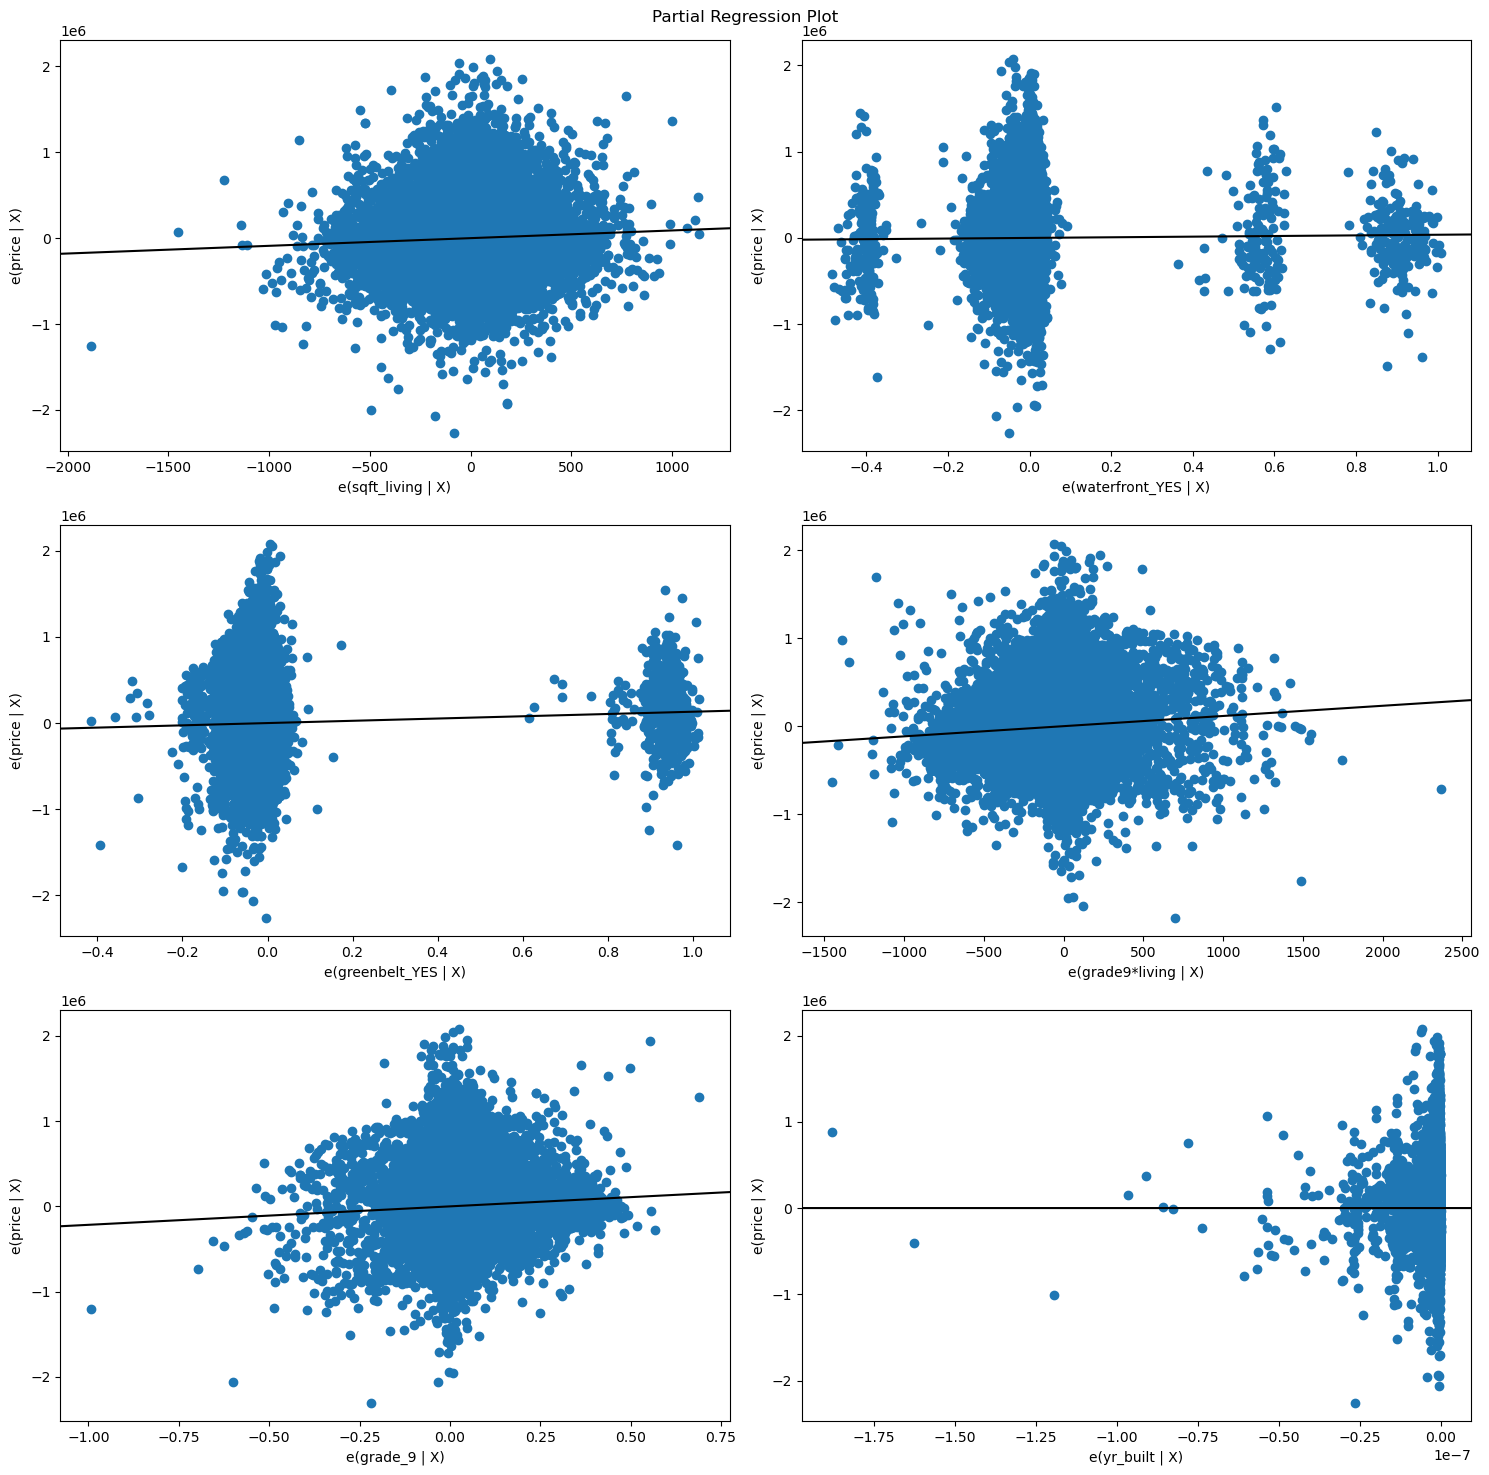

In [32]:
rfe_columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_garage','sqft_patio','yr_built',
               'yr_renovated','house_age','relative_age','greenbelt_YES','nuisance_YES','view_AVERAGE','view_GOOD','condition_Good',
               'condition_Very Good','grade_6', 'grade_8','grade_9', 'grade_10','heat_source_Electricity','heat_source_Gas','sewer_system_PUBLIC','grade6*living','grade8*living','grade9*living','grade10*living']

X = df_final[rfe_columns]
y = df_final['price']
rfe_model = sm.OLS(y, sm.add_constant(X))
rfe_result = rfe_model.fit()
print(rfe_result.summary())

fig = plt.figure(figsize=(15,15));
sm.graphics.plot_partregress_grid(results_final, exog_idx=['sqft_living','waterfront_YES', 'greenbelt_YES', 'grade9*living','grade_9','yr_built' ], fig= fig);
plt.tight_layout();

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


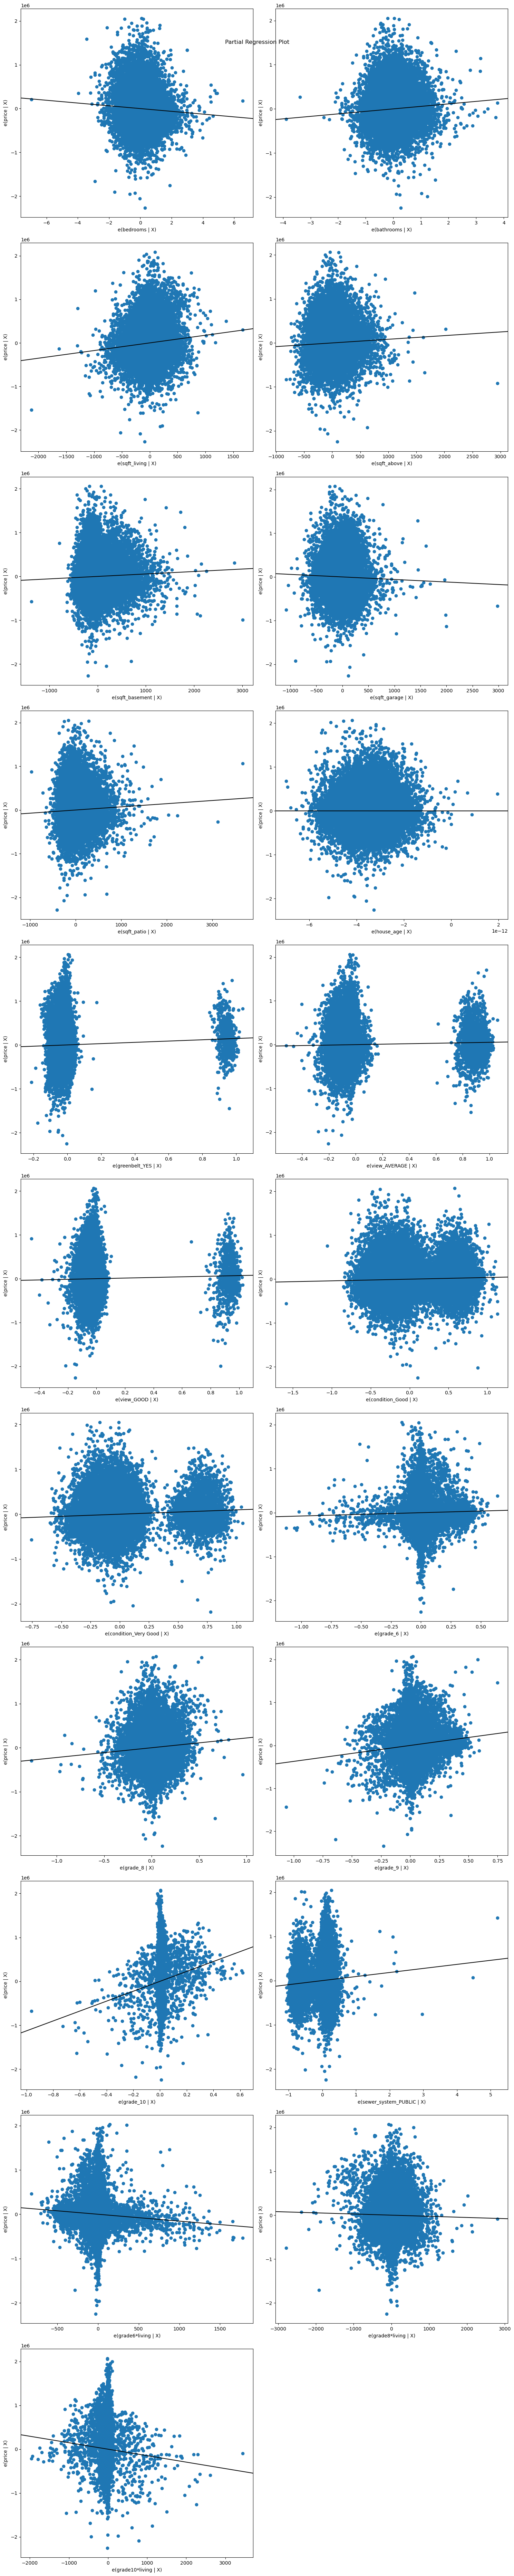

In [45]:

fig = plt.figure(figsize=(15,75));
sm.graphics.plot_partregress_grid(rfe_result, exog_idx= ['bedrooms','bathrooms','sqft_living','sqft_above','sqft_basement','sqft_garage','sqft_patio','house_age','greenbelt_YES','view_AVERAGE','view_GOOD','condition_Good',
           'condition_Very Good','grade_6', 'grade_8','grade_9', 'grade_10','sewer_system_PUBLIC','grade6*living','grade8*living','grade10*living'], fig= fig);
plt.tight_layout();

#### Model Evaluation
The model constant is roughly 0 and is what to be expected from the features. 
Interestingly, the number of bedrooms decreases price while floor and sqft_lot has little influence. Heat source and nuisance doesn't have a significant linear relationship to price 
Grade has a similar effect on price but only included 4 of them to be important. <br>
This model was using RFE which is a quick and easy way to make a model with any list of feature. This however, doesn't guarentee the best perform model. 

### Final Model

In [27]:
print(result_final_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     815.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:02:42   Log-Likelihood:            -4.0995e+05
No. Observations:               28896   AIC:                         8.200e+05
Df Residuals:                   28860   BIC:                         8.203e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.914e+05   1

#### Model Evaluation
The final model added as many parameters as possible. Then I proceed to remove the parameters that aren't statistically significant and remove ones that did not affect the price. The resulting model has a 191,400 price which increases or decreases depending on the parameter. Since the reference are based on the average or lowest attributes, anything higher than average is going to give a high price. 

*For example*, grade 9 benefits from a 200,000 price increase, and that for every square foot that house has, increased by 111 per square foot. Grade 6, however, which is lower than grade 7, the reference, is expected to lose 100,000 and -80 per square foot.  

The model was based on the worst possible category or the average to make it easier to model. We can see clearly that any view is better than no view, but an average view would increase by 60,000 while an excellent view increase by 260,000. 

**All coefficients are statically significant of having a linear relationship with a p-value less than .05.** Grades 3, 4, and 5 were added to the model with greater than .05 p-value due to their interaction terms being statically significant. <br>
**With a p-value of less than .05, the model proves to be better than the baseline model.**

**Recommendation:** Zillow allows the seller to determine the asking price but that could be determined by filling out what the house attributes are. There are easy to provide in most cases and could predict the price for the seller for the website or retailer. Buyers could use this model to know what kind of house would fit their budget while still getting some attributes they desire. There are enough parameters and all are statistically significant for the buyer to simply select what is desired and what could be omitted. 

## Conclusion:
The best-performing parameters are **square feet of living**, **grade** and **house age**. Depending on the grade, the square feet of living can have a positive or negative effect on price. Other categorical attributes like whether or not a house is on a waterfront or greenbelt have shown to have a positive effect on price while others such as **square feet of the garage have a negative effect.** 

**The final model shows a strong positive relationship between price with grade and house age.** The model can only explain roughly **50%** of the variance. Not all parameters matters and some don't have a large enough sample to consider. Based on the reference we used, anything lower or worst than the reference was more likely to give a negative effect on price. 

When considering parameters to add, **not all of them are significant to add in the model**. <br>
Some will have no effects while others need interaction terms to see if they are significant or not. Adding many parameters will make the model *accurate* but could be misleading as R-square will always increase the parameters added. A balance of parameters with linear relationships and categories can lead to an even better model. 

To make a model read easier, **a model should have a negatively linear relationship with the dependent variables.** <br>
Without them, the constant would be negative which in this case would make sense if the model started with a positive value. A positive constant for these models can be inferred as the price of the land itself which doesn't necessarily have the attributes yet. 

**Square foot of living correlates with the grade that benefited the model.** <br>
Finding correlating parameters can lead to an accurate model and should be added if possible.  

## Recommendation
**Zillow:** The final model can be incorporated to potentially improve Zillow current algorithm, Zestimate. <br>
**Buyers:** Buyers should be cautious in buying a house with higher than good condition and view. There is no difference in nuisances so select whichever is more desirable. <br>
**Sellers:** Seller could expand basement and patio square footage while keeping garage square footage to a minimum.<br>

## Next Steps
1. **More Interaction Terms** <br>
The model only has interaction terms with a square foot of living and grade since they were the most correlating parameters to price. There could be other useful interaction terms to be added but wouldn't be obvious to add. 
2. **Added more outside interactions** <br>
Based on the categorical datatypes, the outside environment has a strong effect on the house price. Adding more of these attributes could lead to more linear relationships that could benefit the model. These could be hard to track as the houses span through many years and the environment changes often. 
3. **Current Economic Status** <br>
For the past 3 years, we lived through a pandemic and that could affect house prices. There have been other events that could prove useful to know. Knowing the value of the dollar or inflation rate during the time could give more insight into how buyers and seller value their money.